In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
df = pd.read_csv('data exports/export-1-19-2021.csv')
df.shape

(376, 11)

In [3]:
df.head()

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2: Judgment Day,0
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,The Texas Chain Saw Massacre,0
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers: Endgame,0
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0


In [4]:
df.dtypes

ID                  int64
Date               object
Theme              object
Num_People          int64
Winner_Movie_ID     int64
Voting_Data_ID      int64
People_ID           int64
Name               object
Movie_ID            int64
Title              object
Test                int64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

ID                          int64
Date               datetime64[ns]
Theme                      object
Num_People                  int64
Winner_Movie_ID             int64
Voting_Data_ID              int64
People_ID                   int64
Name                       object
Movie_ID                    int64
Title                      object
Test                        int64
dtype: object

## Explore

In [6]:
df.groupby('Name')['ID'].nunique()

Name
Britt     122
CCC         2
JLC         2
Juliet      2
Mike        2
Nico      122
Pato      122
Tian        2
Name: ID, dtype: int64

In [7]:
df['Name'].nunique()

8

In [8]:
df['Name'].unique().tolist()

['Nico', 'Britt', 'Pato', 'Juliet', 'Mike', 'JLC', 'CCC', 'Tian']

#### Add Title column to winning movies

In [9]:
df['Winning_Title'] = df['Winner_Movie_ID'].map(df.groupby('Movie_ID')['Title'].first())
df.head()

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test,Winning_Title
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2: Judgment Day,0,The Texas Chain Saw Massacre
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0,The Texas Chain Saw Massacre
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,The Texas Chain Saw Massacre,0,The Texas Chain Saw Massacre
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers: Endgame,0,The Texas Chain Saw Massacre
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0,The Texas Chain Saw Massacre


In [10]:
winning_movie_counts = df.groupby('Voting_Data_ID')['Winning_Title'].first().reset_index()

In [11]:
winning_movie_counts

,Voting_Data_ID,Winning_Title
0,1,The Texas Chain Saw Massacre
1,2,Avengers: Endgame
2,3,The Big Short
3,4,The Hateful Eight
4,5,Rocky
...,...,...
57,59,Peaky Blinders
58,60,The Great Gatsby
59,61,Toy Story 4
60,62,Daniel Craig James Bond


### Has any film won more than once?

In [12]:
winning_movie_counts.groupby('Winning_Title')['Voting_Data_ID'].nunique().sort_values(ascending=False)

Winning_Title
22 Jump Street            1
The Hateful Eight         1
Rocky IV                  1
School of Rock            1
Shutter Island            1
                         ..
Monsters University       1
Narcos & Narcos Mexico    1
Ozark                     1
Peaky Blinders            1
Veep                      1
Name: Voting_Data_ID, Length: 62, dtype: int64

#### Add a winning person (winner) column

In [13]:
def winner(row):
    voting_data_id = row['Voting_Data_ID']
    
    winning_title = row['Winning_Title']
    
    winner = df.loc[(df['Voting_Data_ID'] == voting_data_id) & 
                    (df['Title'] == winning_title), 'Name'].values[0]
    
    return winner

In [14]:
df['Winner'] = df.apply(winner, axis=1)

In [15]:
winners = df.groupby('Voting_Data_ID')['Winner'].first().reset_index()

In [16]:
winners.groupby('Winner')['Voting_Data_ID'].nunique().sort_values(ascending=False)

Winner
Pato      22
Britt     20
Nico      18
JLC        1
Juliet     1
Name: Voting_Data_ID, dtype: int64

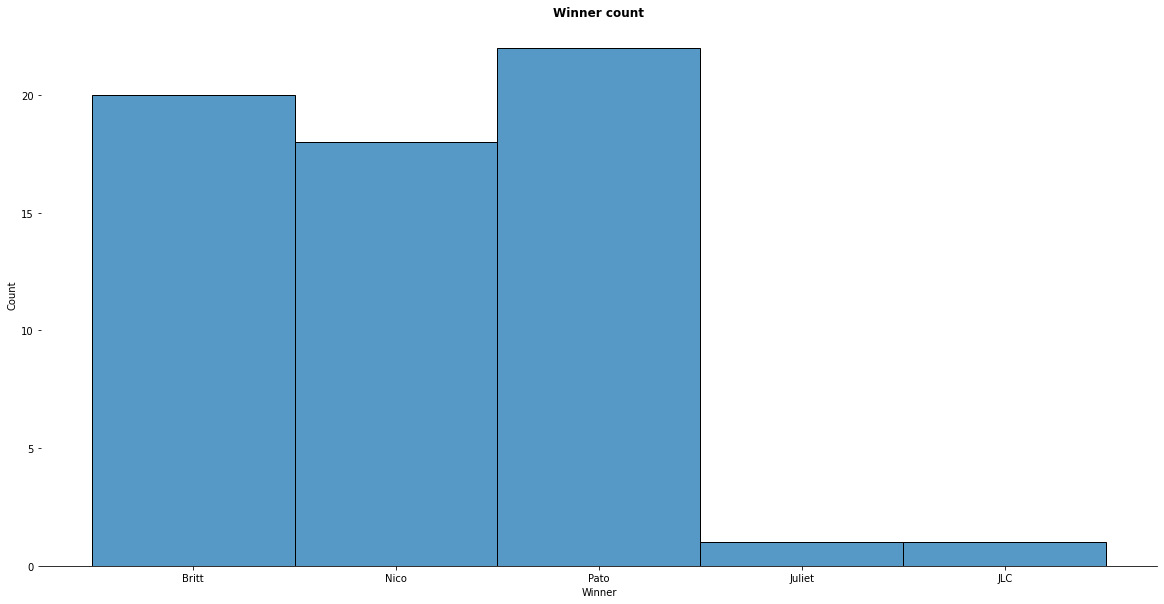

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.despine(fig, top=True, right=True, left=True)

sns.despine(left=True, top=True,right=True)

sns.histplot(x = 'Winner',
             data = winners)

plt.title('Winner count', fontweight='bold')

plt.show()

### Let's look at the Movies

In [18]:
df.head()

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test,Winning_Title,Winner
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2: Judgment Day,0,The Texas Chain Saw Massacre,Britt
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0,The Texas Chain Saw Massacre,Britt
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,The Texas Chain Saw Massacre,0,The Texas Chain Saw Massacre,Britt
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers: Endgame,0,The Texas Chain Saw Massacre,Britt
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0,The Texas Chain Saw Massacre,Britt


In [19]:
df.groupby('Title')['ID'].nunique().sort_values(ascending=False)

Title
A Quiet Place             11
The Lego Batman Movie      8
The Matrix Revolutions     7
Live Free or Die Hard      7
The Dark Knight            6
                          ..
Long Way Up                1
Lord of the Rings          1
Monsters University        1
Motherless Brooklyn        1
Peaky Blinders             1
Name: ID, Length: 203, dtype: int64

In [20]:
df.loc[df['Title'] == 'A Quiet Place'].groupby('Name')['ID'].nunique()

Name
Britt    10
Pato      1
Name: ID, dtype: int64

In [21]:
df.loc[df['Theme'].isnull()]

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test,Winning_Title,Winner
76,76,2020-09-02 19:07:27,NaN,3,66,13,1,Nico,67,Narcos,0,The Wire,Nico
77,77,2020-09-02 19:07:27,NaN,3,66,13,3,Pato,71,Scrubs,0,The Wire,Nico
78,78,2020-09-02 19:07:27,NaN,3,66,13,2,Britt,68,Silicon Valley,0,The Wire,Nico
79,79,2020-09-02 19:07:27,NaN,3,66,13,1,Nico,66,The Wire,0,The Wire,Nico
80,80,2020-09-02 19:07:27,NaN,3,66,13,3,Pato,70,Top Chef,0,The Wire,Nico
81,81,2020-09-02 19:07:27,NaN,3,66,13,2,Britt,69,Veep,0,The Wire,Nico
136,135,2020-10-05 20:06:32,NaN,3,109,24,3,Pato,112,Fargo,0,Narcos & Narcos Mexico,Nico
137,136,2020-10-05 20:06:32,NaN,3,109,24,1,Nico,110,House,0,Narcos & Narcos Mexico,Nico
138,137,2020-10-05 20:06:32,NaN,3,109,24,1,Nico,109,Narcos & Narcos Mexico,0,Narcos & Narcos Mexico,Nico
139,138,2020-10-05 20:06:32,NaN,3,109,24,2,Britt,111,Ozark,0,Narcos & Narcos Mexico,Nico


### Let's try to build a model around the winning people

In [22]:
df.loc[df['Voting_Data_ID'] == 1]

,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test,Winning_Title,Winner
0,1,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,1,Terminator 2: Judgment Day,0,The Texas Chain Saw Massacre,Britt
1,2,2020-08-01 17:04:39,Iconic Villains,3,3,1,1,Nico,2,Inglorious Basterds,0,The Texas Chain Saw Massacre,Britt
2,3,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,3,The Texas Chain Saw Massacre,0,The Texas Chain Saw Massacre,Britt
3,4,2020-08-01 17:04:39,Iconic Villains,3,3,1,2,Britt,4,Avengers: Endgame,0,The Texas Chain Saw Massacre,Britt
4,5,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,5,Misery,0,The Texas Chain Saw Massacre,Britt
5,6,2020-08-01 17:04:39,Iconic Villains,3,3,1,3,Pato,6,2001: A Space Odyssey,0,The Texas Chain Saw Massacre,Britt


In [25]:
winning_person_df = df.groupby(['Voting_Data_ID','Num_People','Winner_Movie_ID'])['Winner'].first().reset_index()
winning_person_df

,Voting_Data_ID,Num_People,Winner_Movie_ID,Winner
0,1,3,3,Britt
1,2,3,4,Britt
2,3,3,13,Nico
3,4,3,18,Pato
4,5,5,20,Juliet
...,...,...,...,...
57,59,3,225,Nico
58,60,3,237,Pato
59,61,3,9,Britt
60,62,3,246,Britt


,ID,Date,Theme,Num_People,Winner_Movie_ID,Voting_Data_ID,People_ID,Name,Movie_ID,Title,Test,Winning_Title,Winner
